In [1]:
!pip install torch torchvision diffusers transformers accelerate pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
original = Image.open("/content/original_bottle_frames.jpg").convert("RGB")
mask = Image.open("/content/masked_bottle_result_white.jpg").convert("RGB")


#prompt = "a red glass bottle with a black cap, placed on a wooden table, dramatic spotlight from above, photorealistic"
prompt = "a wine bottle with gold foil label, cinematic lighting,dramatic spotlight from above,photorealistic lighting"
#prompt = "a wine bottle with a medium size gold foil label, under cinematic lighting, dramatic spotlight from above, high detail, realistic shadows, studio background"

##---------- Inpaint
result = pipe(
    prompt=prompt,
    image=original,
    mask_image=mask,
    strength=1.0,
    guidance_scale=7.5
).images[0]

result.save("bottle_inpainted.png")
print("Inpainting complete for the bottle.")

  0%|          | 0/50 [00:00<?, ?it/s]

Inpainting complete for the bottle.


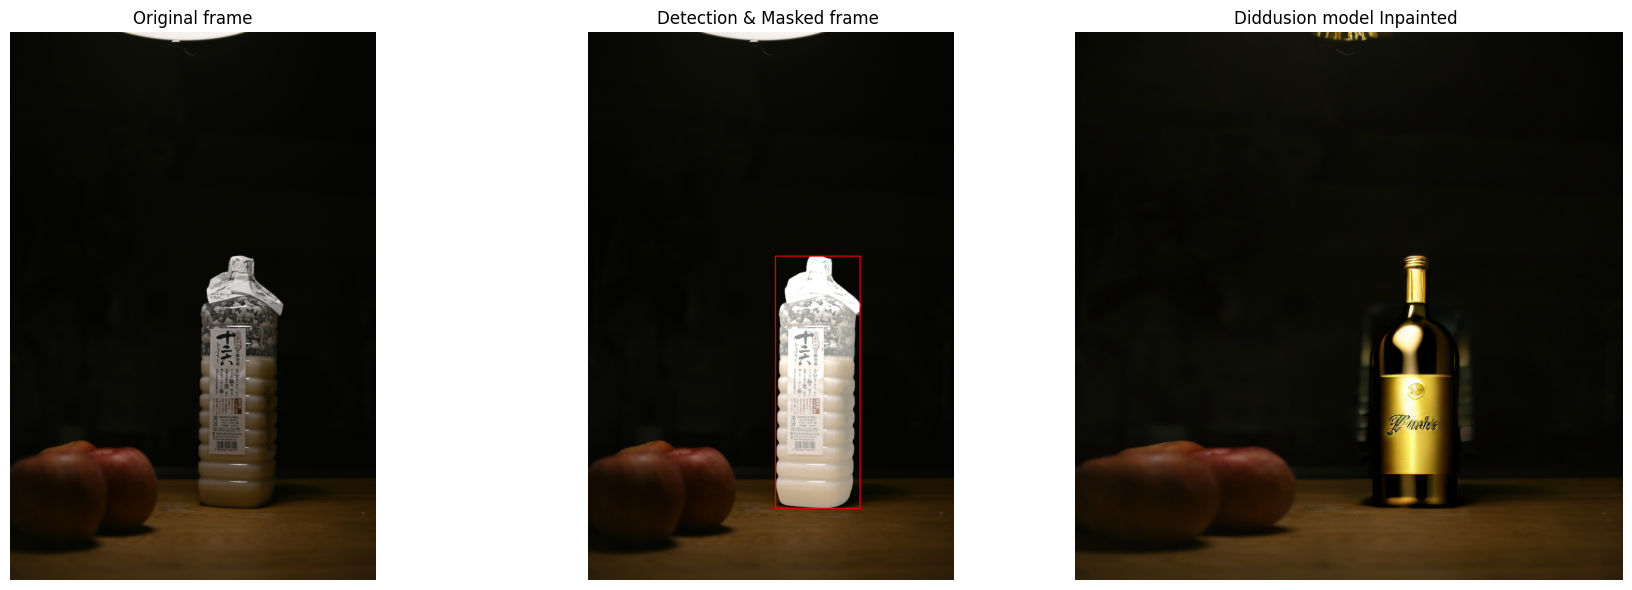

In [11]:
import matplotlib.pyplot as plt

original_img = Image.open("/content/original_bottle_frames.jpg").convert("RGB")
masked_input = Image.open("/content/masked_bottle_result_white.jpg").convert("RGB")
inpainted_result = Image.open("/content/bottle_inpainted.png").convert("RGB")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title("Original frame")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(masked_input)
plt.title("Detection & Masked frame ")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(inpainted_result)
plt.title("Diffusion model Inpainted ")
plt.axis("off")

plt.tight_layout()
plt.show()